#  Matris Grafikleri

Matris grafiği, DataFrame'deki tüm sayısal değerleri görselleştirerek görüntüler!

İki temel matris grafiği tipi vardır:
  - heatmap()
       - Renk eşleşme ile hücre değerlerinin dağılımını görsel olarak görüntüler.
  - clustermap()
       - Isı haritasıyla aynı görseldir, ancak önce verileri gruplar halinde yeniden düzenlemek için hiyerarşik kümeleme gerçekleştirir.

**NOT: Tüm veri kümeleri ısı veya küme haritası için uygun değildir.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Veri

World Population Prospects, dünya ülkeleri için ve her yıl 1950'den 2020'ye kadar Birleşmiş Milletler nüfus tahminlerinin yanı sıra 2020'den 2100'e kadar farklı senaryolar (düşük, orta ve yüksek değişkenler) için projeksiyonlar yayınlamaktadır. Burada sunulan rakamlar, aşağıdakiler için orta değişken projeksiyonlarına karşılık gelmektedir.

https://www.ined.fr/en/everything_about_population/data/all-countries/?lst_continent=900&lst_pays=926

**Kaynak:** Dünya Nüfus Beklentilerinden elde edilen verilere dayalı cari yıl için tahminler. Birleşmiş Milletler.

In [2]:
# 2020 Projeksiyonları
df = pd.read_csv('country_table.csv')

In [3]:
df

,Countries,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
0,AFRICA,32.577,7.837,63.472,44.215,24.40
1,ASIA,15.796,7.030,73.787,23.185,8.44
2,EUROPE,10.118,11.163,78.740,3.750,0.38
3,LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
4,NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
5,OCEANIA,16.235,6.788,78.880,16.939,12.79
6,WORLD,17.963,7.601,72.766,27.492,10.36


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Countries              7 non-null      object 
 1   Birth rate             7 non-null      float64
 2   Mortality rate         7 non-null      float64
 3   Life expectancy        7 non-null      float64
 4   Infant mortality rate  7 non-null      float64
 5   Growth rate            7 non-null      float64
dtypes: float64(5), object(1)
memory usage: 464.0+ bytes


In [5]:
df = df.set_index('Countries')

In [6]:
df

,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
Countries,,,,,
AFRICA,32.577,7.837,63.472,44.215,24.40
ASIA,15.796,7.030,73.787,23.185,8.44
EUROPE,10.118,11.163,78.740,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
OCEANIA,16.235,6.788,78.880,16.939,12.79
WORLD,17.963,7.601,72.766,27.492,10.36


## heatmap()

Bir ısı haritasının ideal olarak tüm hücrelerin aynı birimlerde olması gerektiğini unutmayın, bu sayede renk eşleme tüm DataFrame'de anlamlıdır.

<AxesSubplot:ylabel='Countries'>

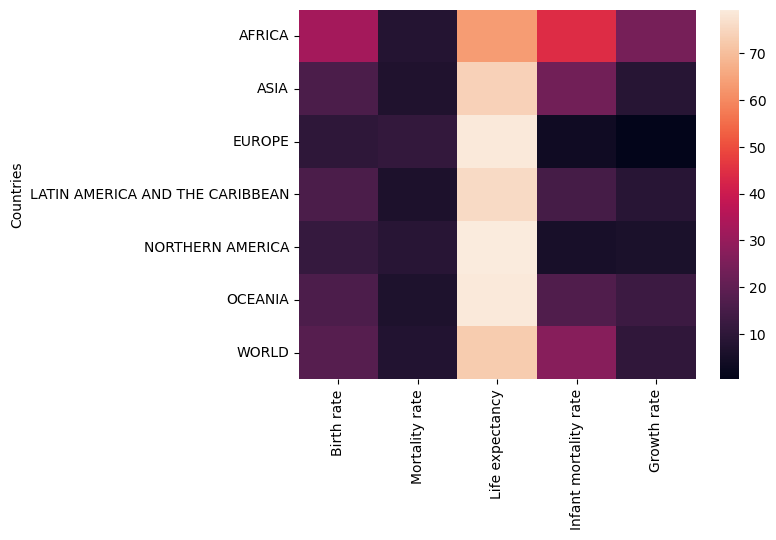

In [7]:
# Farklı birimlerde yaşam beklentisini açıkça gösterir
sns.heatmap(df)

In [8]:
rates = df.drop('Life expectancy',axis=1)

<AxesSubplot:ylabel='Countries'>

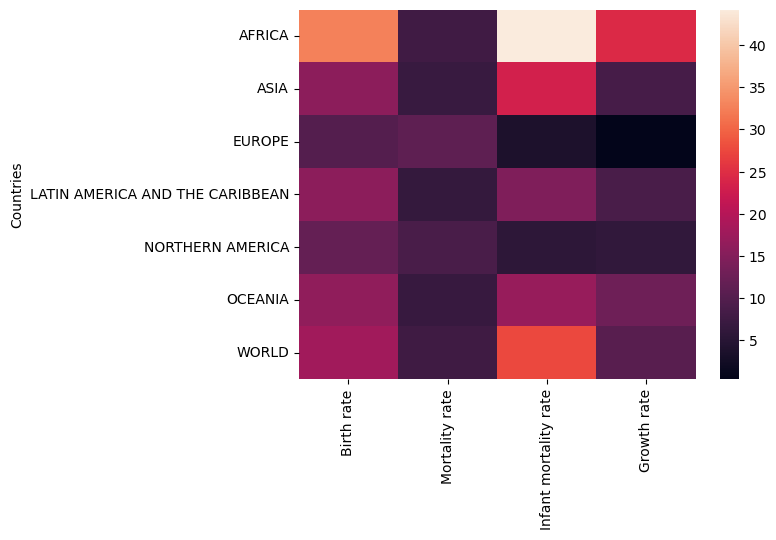

In [9]:
sns.heatmap(rates)

<AxesSubplot:ylabel='Countries'>

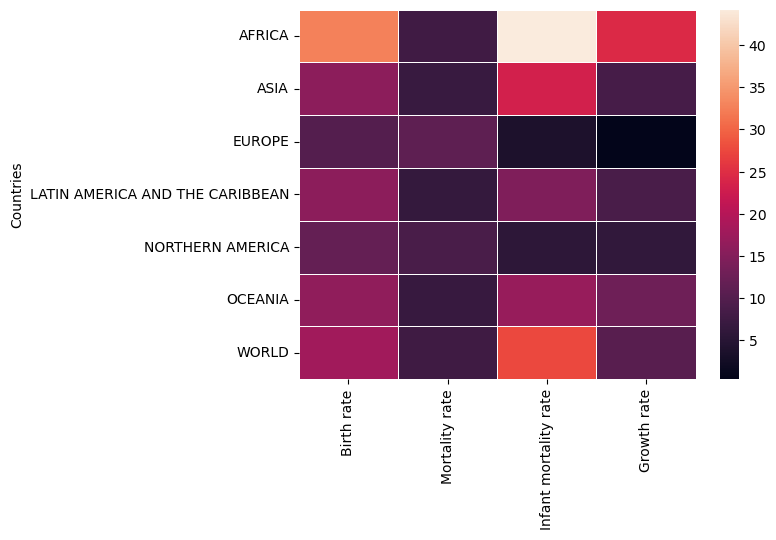

In [10]:
sns.heatmap(rates,linewidth=0.5)

<AxesSubplot:ylabel='Countries'>

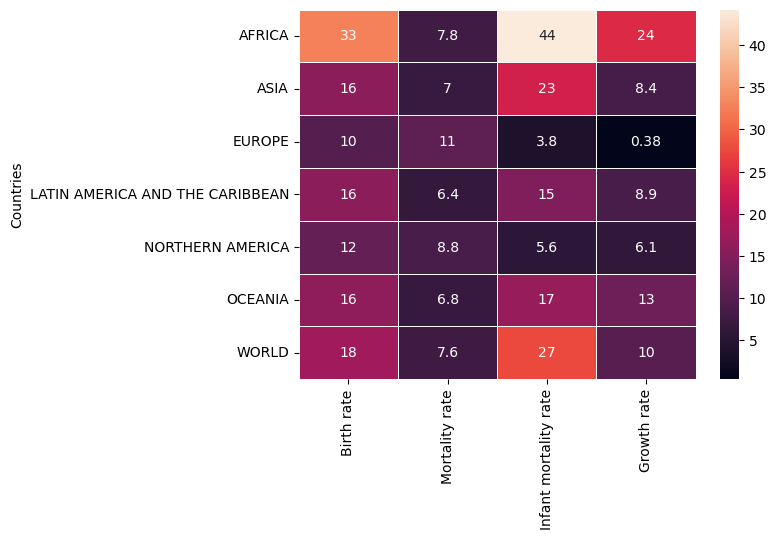

In [11]:
sns.heatmap(rates,lw=0.5,annot=True)

<AxesSubplot:ylabel='Countries'>

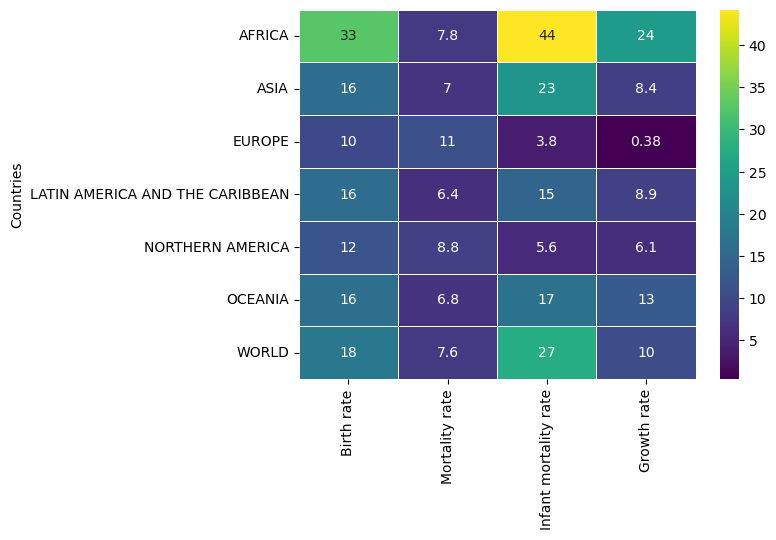

In [12]:
# Burada palete dikkat edin
sns.heatmap(rates,linewidth=0.5,annot=True,cmap='viridis')

<AxesSubplot:ylabel='Countries'>

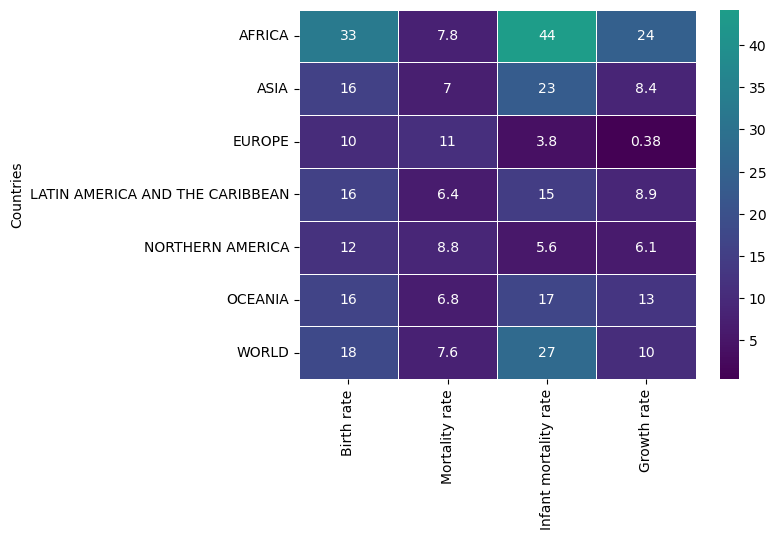

In [13]:
# Renk çubuğunu veri kümesindeki değere göre ayarlama
sns.heatmap(rates,lw=0.5,annot=True,cmap='viridis',center=40)

<AxesSubplot:ylabel='Countries'>

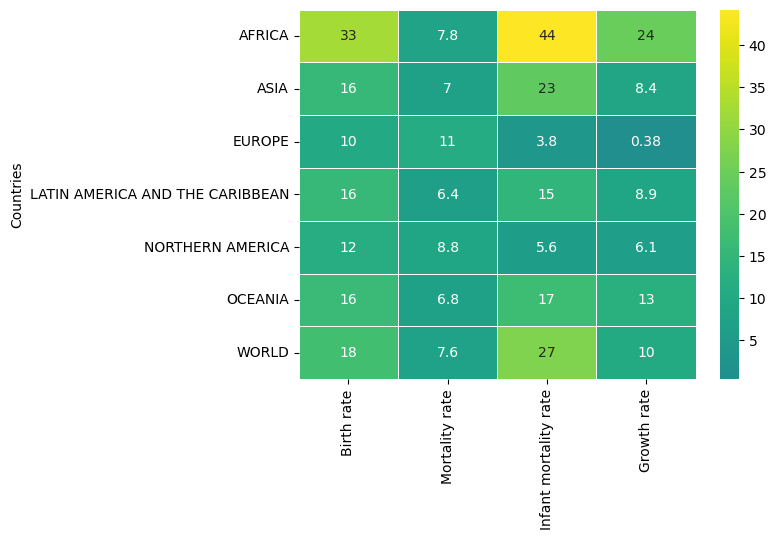

In [14]:
# Renk çubuğunu veri kümesindeki değere göre ayarlama
sns.heatmap(rates,lw=0.5,annot=True,cmap='viridis',center=1)

## clustermap()

Hiyerarşik olarak kümelenmiş bir ısı haritası olarak bir matris veri kümesini çizme.

Seaborn, benzer gruplamaları otomatik olarak kümeleme özelliğine de sahiptir.

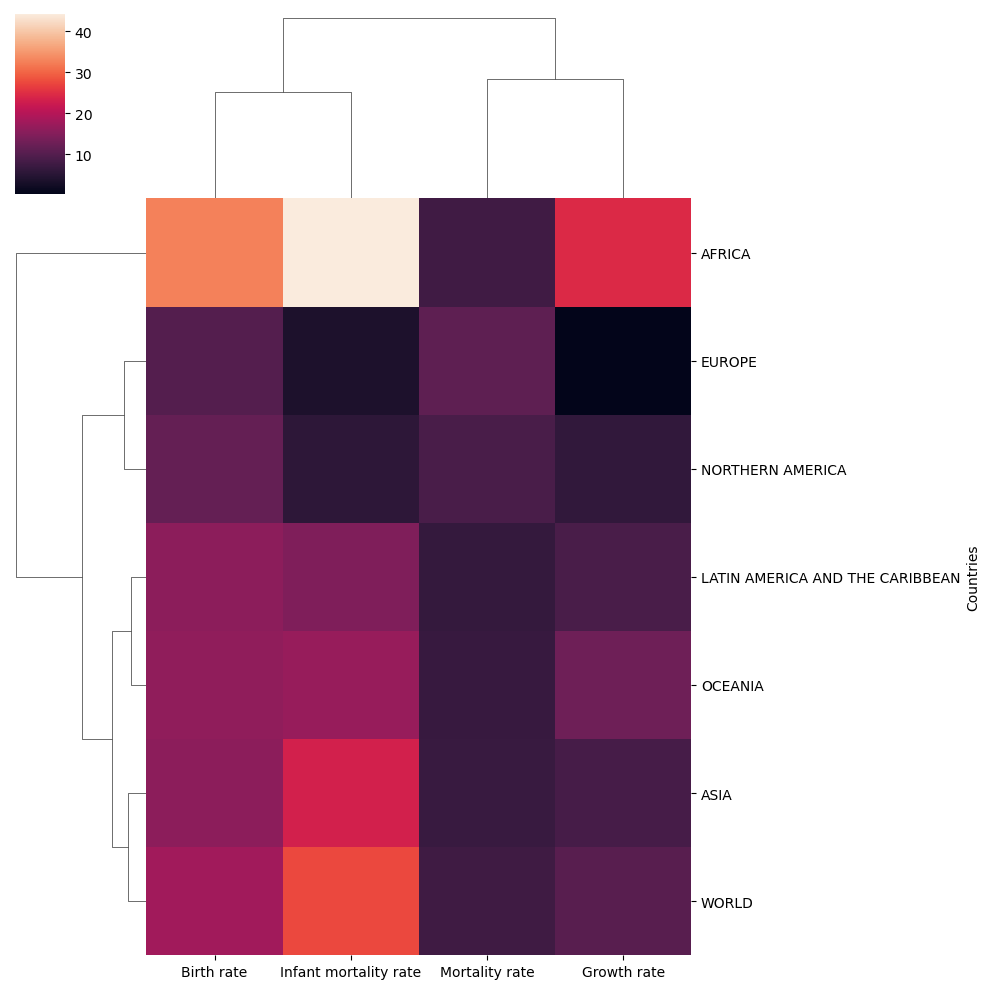

In [16]:
sns.clustermap(rates)

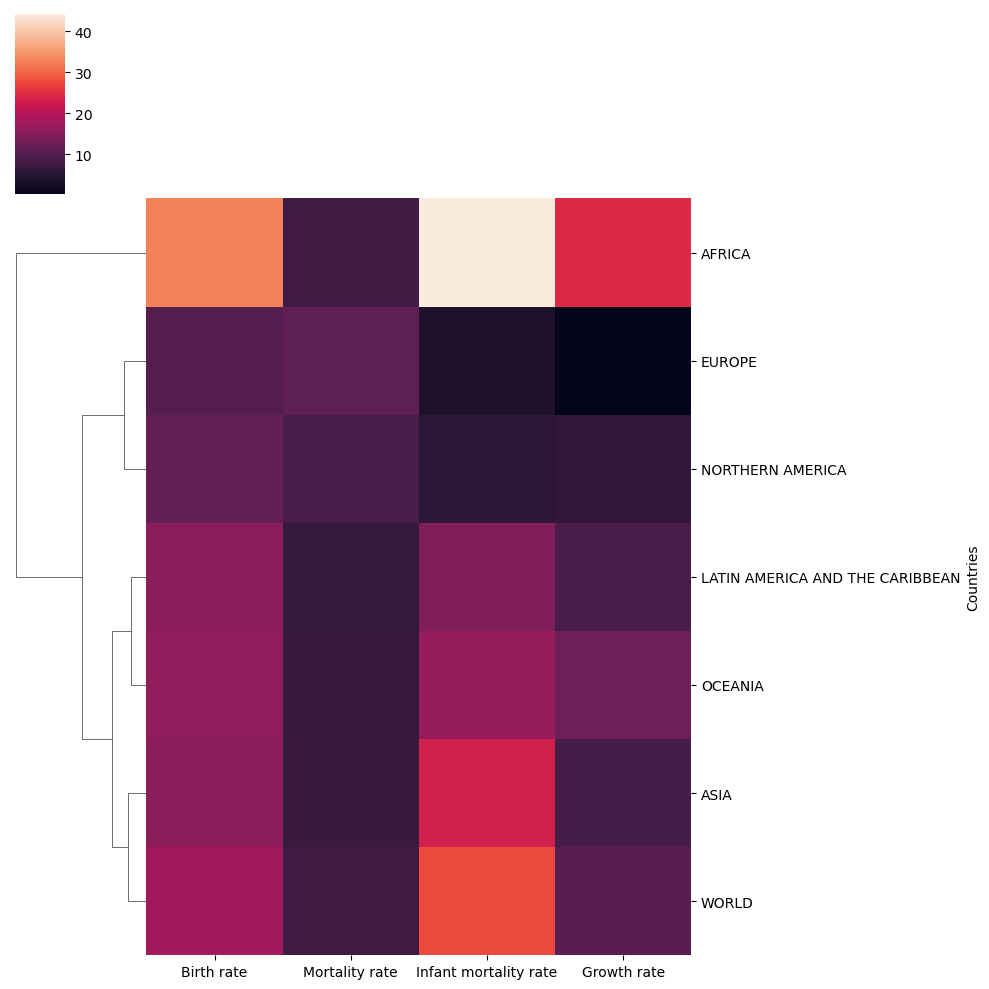

In [17]:
sns.clustermap(rates,col_cluster=False)

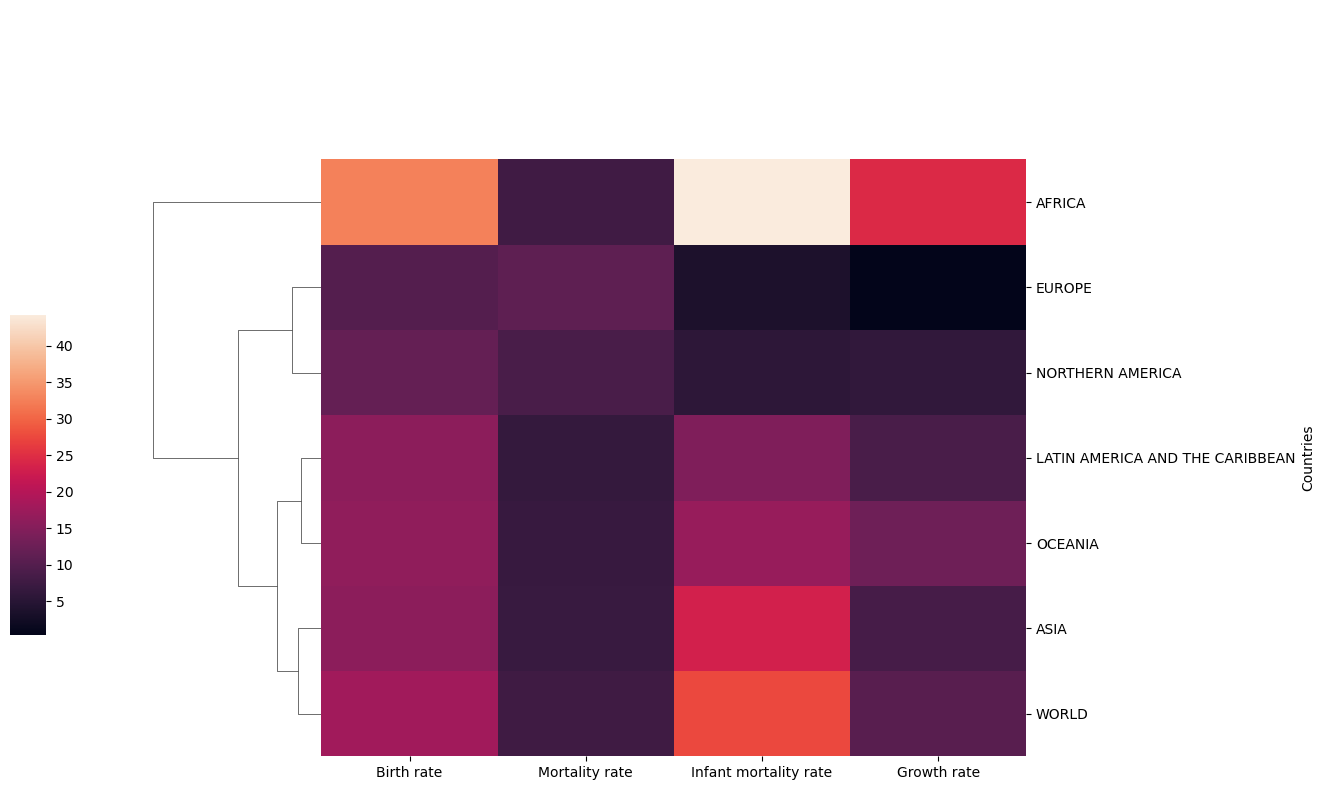

In [18]:
# seaborn'dan önce her zaman df'yi düzenleyebileceğinizi hatırlayın
sns.clustermap(rates,col_cluster=False,
               figsize=(12,8),
               cbar_pos=(-0.1,.2,.03,.4))

In [19]:
rates.index.set_names('',inplace=True)
rates

,Birth rate,Mortality rate,Infant mortality rate,Growth rate
,,,,
AFRICA,32.577,7.837,44.215,24.40
ASIA,15.796,7.030,23.185,8.44
EUROPE,10.118,11.163,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,14.570,8.89
NORTHERN AMERICA,11.780,8.833,5.563,6.11
OCEANIA,16.235,6.788,16.939,12.79
WORLD,17.963,7.601,27.492,10.36


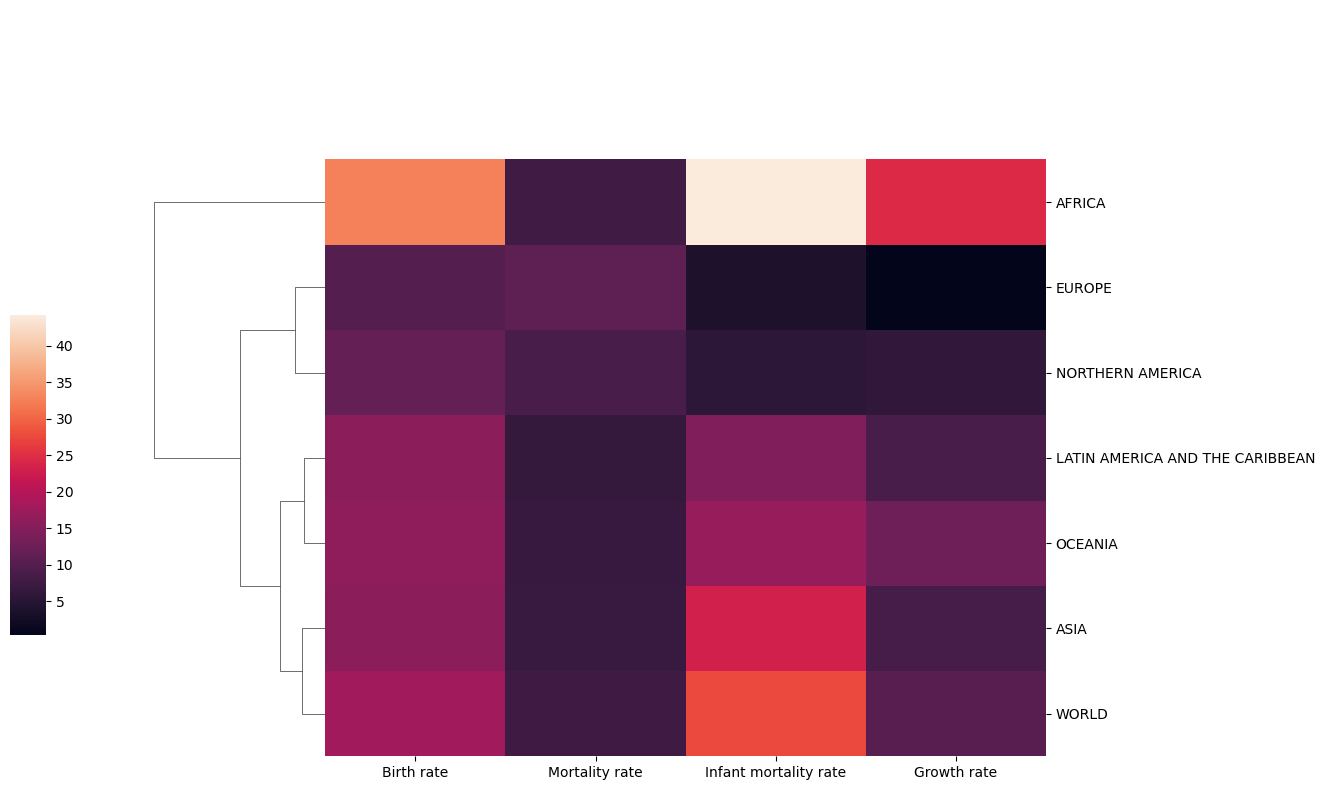

In [20]:
sns.clustermap(rates,col_cluster=False,
               figsize=(12,8),
               cbar_pos=(-0.1,.2,.03,.4))

# SON!